In [130]:
def train(x_train,y_train):
    #do nothing
    return

In [131]:
def predict(x_train,y_train,x_test,k):
    
    distances=[]
    target=[]
   
    for i in range(len(x_train)):
        #calculate eucledian distance
        distance=np.sqrt(np.sum(np.square(x_test-x_train[i])))
        
        #Append distance along with index to distances list
        distances.append([distance,i])
    
    #sort the distances list
    distances=sorted(distances)
    
    
    #calculate target for k nearest neighbors
    for i in range(0,k):
        index = distances[i][1]        
        target.append(y_train[index])
    
       
    #return most common value
    return Counter(target).most_common(1)[0][0] 

In [132]:
def KNN(x_train,y_train,x_test,predictions,k):
    
    #train input data
    train(x_train,y_train)
    
    #predict value for each x_test
    for i in range(len(x_test)):
        predictions.append(predict(x_train,y_train,x_test[i],k))

In [167]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris=load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('Shape of x:',x_train.shape,' Shape of y:', y_train.shape)

Shape of x: (120, 4)  Shape of y: (120,)


In [169]:
predictions=[]
KNN(x_train,y_train,x_test,predictions,7)

In [170]:
print(accuracy_score(predictions,y_test))

0.9333333333333333


In [208]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

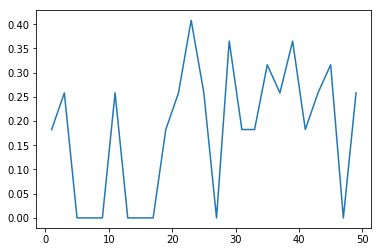

In [212]:
#Cross-validating the algorithm
rms=[]
for k in range(1,50,2):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    y_pred=[]
    KNN(x_train,y_train,x_test,y_pred,k)
    prediction=accuracy_score(y_pred,y_test)
    rms.append(sqrt(mean_squared_error(y_test, y_pred)))
    
k=np.arange(1,50,2)
plt.plot(k,rms)
plt.show()